Feature shape: (784,)
Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8957 - loss: 0.3684 - val_accuracy: 0.9498 - val_loss: 0.1746
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9581 - loss: 0.1444 - val_accuracy: 0.9610 - val_loss: 0.1335
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9715 - loss: 0.1002 - val_accuracy: 0.9672 - val_loss: 0.1081
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9783 - loss: 0.0740 - val_accuracy: 0.9708 - val_loss: 0.0992
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9838 - loss: 0.0559 - val_accuracy: 0.9737 - val_loss: 0.0852
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9878 - loss: 0.0417 - val_accuracy: 0.9766 - val_loss: 0.0829
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9914 - loss: 0.0320 - val_accuracy: 0.9758 - val_loss: 0.0835
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9930 - l

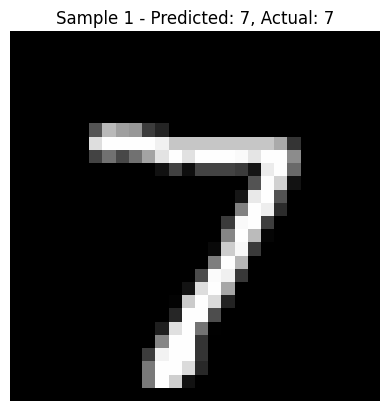

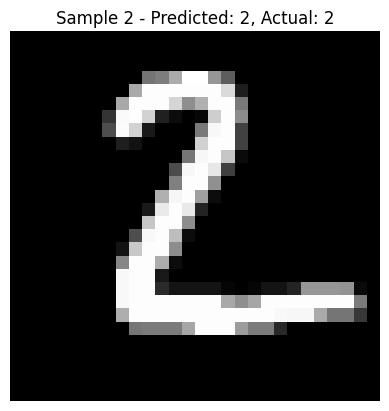

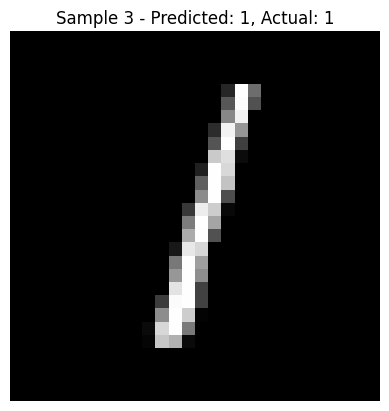

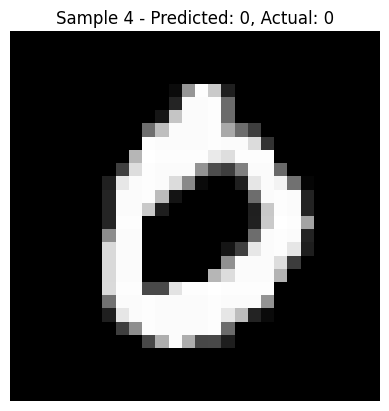

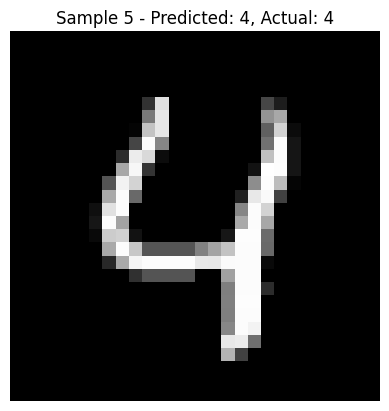

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

feature_vector_length = 784
num_classes = 10

# Load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], feature_vector_length).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], feature_vector_length).astype('float32') / 255

# One-hot encode labels
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Build model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Evaluate
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

# Predict first 5 samples
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:5], axis=1)

for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()
